<a href="https://colab.research.google.com/github/FariusGitHub/Learn-OpenGLES-Tutorials/blob/master/machineLearning_LearningRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Data Science Fall 2020 Prebootcamp - F Tjioesman
inspired by Machine Learning Gradient Descent Learning Rate by Nick Pogrebnyakov

This exercise illustrates slow to converge and oveshooting mechanism of two learning rate alpha. Given a small alpha value the gradient descent can be slow to converge. On the other hand given a big alpha value the gradient descent can overshoot the minimum.

I picked an example of a parabolic equation of y = (x+5).(x+5) between x=-10 and x=2.
Alpha of 0.3 showed slow converge, alpha of 0.92 showed an overshoot for this case.
The slow converge is represented by a green line and the overshoot by a red line.

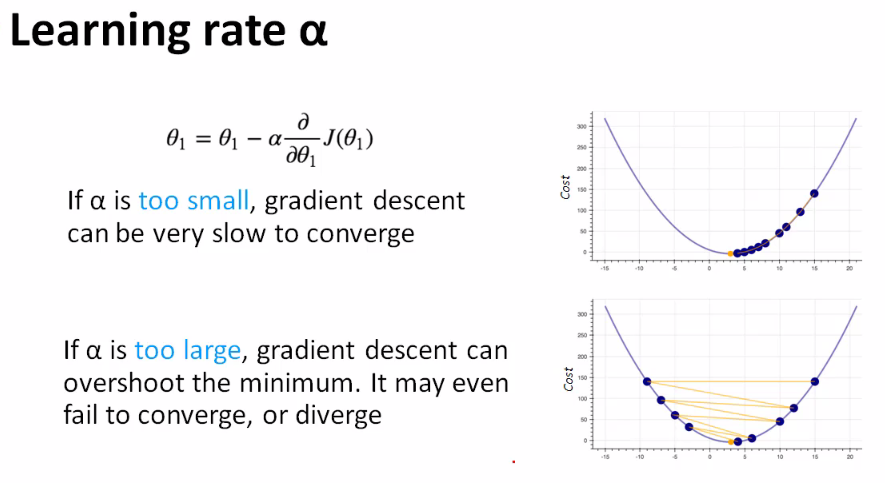

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,2,100) #create linear spacing for graphing original curve
rate = [0.3, 0.92]         # Learning rate for overshoot rate = .92, slow r=.3

precision = 0.000001       # This tells us when to stop the algorithm
max_iters = 1000           # maximum number of iterations

yf = lambda x: (x+5)**2    # original function  
df = lambda x: 2*(x+5)     # Gradient of the function 

X1=[]                      # clear x axis for the slow converge
Y1=[]                      # clear y axis for the slow converge
X2=[]                      # clear x axis for the overshoot 
Y2=[]                      # clear y axis for the overshoot 

for a in range(len(rate)):
    previous_step_size = 1 
    iters = 0              # iteration counter
    cur_x = -10            #The algorithm starts at x=-10

    while previous_step_size > precision and iters < max_iters:

        prev_x = cur_x #Store current x value in prev_x
   
        if a==0:
            cur_x = cur_x - rate[a] * df(prev_x) #Grad descent for slow converge
            X1.append(prev_x)
            Y1.append(yf(prev_x))
        else:
            cur_x = cur_x - rate[a] * df(prev_x) #Grad descent for the overshoot
            X2.append(prev_x)
            Y2.append(yf(prev_x))

        previous_step_size = abs(cur_x - prev_x) #Change in x
        iters = iters+1 #iteration count

fig = plt.figure(dpi=10)
fig, axes = plt.subplots(1, 2)
axes[0].plot(X1,Y1,'green', linewidth=5)
axes[0].plot(x, yf(x), 'black')
axes[0].set_title('slow converge')
axes[1].plot(X2,Y2,'red', linewidth=5)
axes[1].plot(x, yf(x), 'black')
axes[1].set_title('overshooting')
